<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Geospatial/vector_attribute_manipulation_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Vector Attribute Manipulation in R

Zia Ahmed, University at Buffalo

Vector attribute manipulation involves working with the attribute data associated with geographic features in vector datasets. This process allows you to modify, aggregate, transform, and analyze the non-spatial information linked to each feature. In R, you can use packages like **`sf`** and **`dplyr`** from the **`tidyverse`** to perform attribute manipulation on vector data. When working with spatial data within the tidyverse framework, the **sf** package (Simple Features) plays a central role. This package seamlessly integrates spatial geometries with attribute manipulation using the familiar syntax of the **`dplyr`** and **`tidyr`** packages from the **`tidyverse`**. This integration makes it easy to work with both the spatial and attribute aspects of your vector data.

Here are some common tasks related to vector attribute manipulation you can accomplish:

* **Filtering**: Selecting specific features based on certain criteria from the attribute data.

* **Attribute Calculation**: Creating new attributes or modifying existing ones using mathematical operations or functions.

* **Grouping and Aggregation**: Summarizing data by grouping features based on attribute values.

* **Sorting**: Ordering features based on attribute values.

* **Joining**: Combining attributes from different datasets based on a common identifier.

* **Attribute Transformation**: Applying functions to attribute values to transform them.

* **String Manipulation**: Modifying text attributes using string functions.

* **Conditional Updating**: Updating attributes based on certain conditions.

* **Reshaping**: Changing the structure of the attribute data (e.g., wide to long format).

### Install rpy2

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314931 sha256=f23ad2ce6b89263623e11f4a29c254f6d286679374647d505397e6439045cdd1
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Pcakages

In [ ]:
%%R
install.packages(c('rgdal','maptools', 'raster', 'sf', 'rgeos', 'terra', 'tidyverse', 'devtools'), lib='drive/My Drive/R/')

### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library(sf)
library(terra)
library(tidyverse)
library(rgdal)

### Data

In this exercise we will use district wise rice production data of Bangladesh.

1.  Rice production by district of Bangladesh (bd_district_rice_production_2018_2019_BTM.shp)

2.  Upazila shape file of Bangladesh (bd_upzila_BTM.shp)

3.  CSV file of Upazila wise Poverty data (bd_poverty.csv)

The data could be found [here](https://github.com/zia207/r-colab/tree/main/Data/Bangladesh/) for download.

We will use **sf::st_read()** to the data directly from github:

In [ ]:
%%R
# SFDF: Simple feature datafrme
SFDF = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_district_rice_production_2018_2019_BTM.shp")

Reading layer `bd_district_rice_production_2018_2019_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_district_rice_production_2018_2019_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 64 features and 19 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


You can use **dplyr::glimps()** to explore the attribute tables associated with shape file:

In [ ]:
%%R
dplyr::glimpse(SFDF)

Rows: 64
Columns: 20
$ Shape_Leng <dbl> 5.358126, 4.167970, 7.713625, 10.091155, 4.289236, 3.598531…
$ Shape_Area <dbl> 0.40135919, 0.11780114, 0.19522826, 0.17081236, 0.26009774,…
$ ADM2_EN    <chr> "Bandarban", "Barguna", "Barisal", "Bhola", "Bogra", "Braha…
$ ADM2_PCODE <chr> "BD2003", "BD1004", "BD1006", "BD1009", "BD5010", "BD2012",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Coxs Bazar", NA, N…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM1_EN    <chr> "Chittagong", "Barisal", "Barisal", "Barisal", "Rajshahi", …
$ ADM1_PCODE <chr> "BD20", "BD10", "BD10", "BD10", "BD50", "BD20", "BD20", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

### Rename attributes

Division and district name are in this attribute table named as "ADM1_EN" and "ADM2_EN, respectively. We will rename these attribute as "DIV_Name" and "DIST_Name" using **dplyr::rename()** function

In [ ]:
%%R
SFDF.new<-dplyr::rename(SFDF, DIST_Name = ADM2_EN, DIV_Name = ADM1_EN) %>%
glimpse()


Rows: 64
Columns: 20
$ Shape_Leng <dbl> 5.358126, 4.167970, 7.713625, 10.091155, 4.289236, 3.598531…
$ Shape_Area <dbl> 0.40135919, 0.11780114, 0.19522826, 0.17081236, 0.26009774,…
$ DIST_Name  <chr> "Bandarban", "Barguna", "Barisal", "Bhola", "Bogra", "Braha…
$ ADM2_PCODE <chr> "BD2003", "BD1004", "BD1006", "BD1009", "BD5010", "BD2012",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Coxs Bazar", NA, N…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ DIV_Name   <chr> "Chittagong", "Barisal", "Barisal", "Barisal", "Rajshahi", …
$ ADM1_PCODE <chr> "BD20", "BD10", "BD10", "BD10", "BD50", "BD20", "BD20", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

You can apply the **ggplot()** function directly on the sf object to plot them.

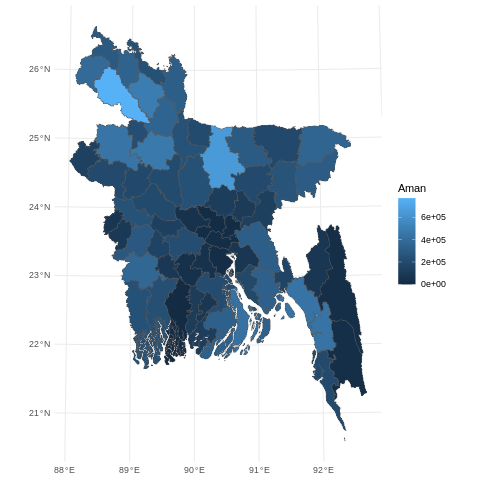

In [ ]:
%%R
SFDF.new %>%
  ggplot() +
  geom_sf(aes(fill = Aman)) +
  theme_minimal()

### Drop Geometry

SFDF.new contains several non-geographic columns (and one geometry list column) with almost 64 rows representing the district of Bangladesh. The function **sf::st_drop_geometry()** keeps only the attributes data of an sf object, in other words removing its geometry. Dropping the geometry column before working with attribute data can be useful; data manipulation processes can run faster when they work only on the attribute data and geometry columns are not always needed.

In [ ]:
%%R
DF<-st_drop_geometry(SFDF.new) %>%
  glimpse()

Rows: 64
Columns: 19
$ Shape_Leng <dbl> 5.358126, 4.167970, 7.713625, 10.091155, 4.289236, 3.598531…
$ Shape_Area <dbl> 0.40135919, 0.11780114, 0.19522826, 0.17081236, 0.26009774,…
$ DIST_Name  <chr> "Bandarban", "Barguna", "Barisal", "Bhola", "Bogra", "Braha…
$ ADM2_PCODE <chr> "BD2003", "BD1004", "BD1006", "BD1009", "BD5010", "BD2012",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Coxs Bazar", NA, N…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ DIV_Name   <chr> "Chittagong", "Barisal", "Barisal", "Barisal", "Rajshahi", …
$ ADM1_PCODE <chr> "BD20", "BD10", "BD10", "BD10", "BD50", "BD20", "BD20", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

### Subsetting

Subsetting refers to selecting a subset of data from a larger dataset based on specific conditions or criteria. In other words, it involves extracting a portion of the data that meets specific requirements or characteristics. Subsetting is a common operation in data analysis that focuses on a specific subset of interest for further analysis, visualization, or processing.

In spatial data analysis, subsetting often involves selecting a subset of spatial features (points, lines, polygons) from a larger geographic dataset. This could include selecting specific geographic areas, isolating certain types of features, or narrowing down the dataset to a particular period or attribute value.

The **[** operator can subset both rows and columns. Indices placed inside square brackets placed directly after a data frame object name specify the elements to keep. The key **dplyr** subsetting functions are **filter()** and **slice()** for subsetting rows, and **select()** for subsetting columns. Both approaches preserve the spatial components of attribute data in sf objects.

In [ ]:
%%R
SFDF.new[1:10] # Subset row by position

Simple feature collection with 64 features and 10 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs
First 10 features:
   Shape_Leng Shape_Area     DIST_Name ADM2_PCODE ADM2_REF ADM2ALT1EN
1    5.358126  0.4013592     Bandarban     BD2003     <NA>       <NA>
2    4.167970  0.1178011       Barguna     BD1004     <NA>       <NA>
3    7.713625  0.1952283       Barisal     BD1006     <NA>       <NA>
4   10.091155  0.1708124         Bhola     BD1009     <NA>       <NA>
5    4.289236  0.2600977         Bogra     BD5010     <NA>       <NA>
6    3.598531  0.1705439 Brahamanbaria     BD2012     <NA>       <NA>
7    4.332182  0.1296815      Chandpur     BD2013     <NA>       <NA>
8    8.259337  0.3904653    Chittagong     BD2015     <NA>       <NA>
9    2.328542  0.1030781     Chuadanga     BD4018     <NA>  

In [ ]:
%%R
SFDF.new[, 15:20]    # subset columns by position

Simple feature collection with 64 features and 5 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs
First 10 features:
   DISTRICT_I      YEAR    Aus   Aman   Boro                       geometry
1      BD2003 2018-2019  23672  26210  24253 MULTIPOLYGON (((745209.5 47...
2      BD1004 2018-2019  11650 116802 256997 MULTIPOLYGON (((487586.8 44...
3      BD1006 2018-2019  38239 208723 195101 MULTIPOLYGON (((556973.9 49...
4      BD1009 2018-2019 172102 423522 161003 MULTIPOLYGON (((579740 4170...
5      BD5010 2018-2019  57385 467997 709612 MULTIPOLYGON (((432389 7787...
6      BD2012 2018-2019  20992 133161 471298 MULTIPOLYGON (((632854.6 68...
7      BD2013 2018-2019  26286  79413 237576 MULTIPOLYGON (((562751.1 54...
8      BD2015 2018-2019  97581 435740 244972 MULTIPOLYGON (((693227.3 45...
9      

In [ ]:
%%R
SFDF.new[1:10, 15:20] # subset rows and columns by position

Simple feature collection with 10 features and 5 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 360715.6 ymin: 344101.5 xmax: 778101.8 ymax: 778758.6
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs
   DISTRICT_I      YEAR    Aus   Aman   Boro                       geometry
1      BD2003 2018-2019  23672  26210  24253 MULTIPOLYGON (((745209.5 47...
2      BD1004 2018-2019  11650 116802 256997 MULTIPOLYGON (((487586.8 44...
3      BD1006 2018-2019  38239 208723 195101 MULTIPOLYGON (((556973.9 49...
4      BD1009 2018-2019 172102 423522 161003 MULTIPOLYGON (((579740 4170...
5      BD5010 2018-2019  57385 467997 709612 MULTIPOLYGON (((432389 7787...
6      BD2012 2018-2019  20992 133161 471298 MULTIPOLYGON (((632854.6 68...
7      BD2013 2018-2019  26286  79413 237576 MULTIPOLYGON (((562751.1 54...
8      BD2015 2018-2019  97581 435740 244972 MULTIPOLYGON (((693227.3 45...
9      BD4018 2018-2019 10

We use create a another SFDF object by subsetting columns by name and "geometry" column will automatically retain in this new sf object

In [ ]:
%%R
SFDF.subset<-SFDF.new[, c('DIST_Name', 'DIV_Name', 'YEAR', 'Aus', 'Aman', 'Boro')] %>%
  glimpse()

Rows: 64
Columns: 7
$ DIST_Name <chr> "Bandarban", "Barguna", "Barisal", "Bhola", "Bogra", "Braham…
$ DIV_Name  <chr> "Chittagong", "Barisal", "Barisal", "Barisal", "Rajshahi", "…
$ YEAR      <chr> "2018-2019", "2018-2019", "2018-2019", "2018-2019", "2018-20…
$ Aus       <dbl> 23672, 11650, 38239, 172102, 57385, 20992, 26286, 97581, 109…
$ Aman      <dbl> 26210, 116802, 208723, 423522, 467997, 133161, 79413, 435740…
$ Boro      <dbl> 24253, 256997, 195101, 161003, 709612, 471298, 237576, 24497…
$ geometry  <MULTIPOLYGON [m]> MULTIPOLYGON (((745209.5 47..., MULTIPOLYGON ((…


You can apply **dplyr::filter()** function to extract all district under "Rangpur", "Rajshahi" divisions

In [ ]:
%%R
SFDF.subset %>%
  filter(DIV_Name %in% c("Rangpur", "Rajshahi")) %>%
  glimpse()

Rows: 16
Columns: 7
$ DIST_Name <chr> "Bogra", "Dinajpur", "Gaibandha", "Joypurhat", "Kurigram", "…
$ DIV_Name  <chr> "Rajshahi", "Rangpur", "Rangpur", "Rajshahi", "Rangpur", "Ra…
$ YEAR      <chr> "2018-2019", "2018-2019", "2018-2019", "2018-2019", "2018-20…
$ Aus       <dbl> 57385, 20324, 6157, 471, 3692, 14134, 179648, 18043, 138418,…
$ Aman      <dbl> 467997, 770155, 349760, 218127, 314620, 239059, 443820, 1914…
$ Boro      <dbl> 709612, 681567, 479310, 290082, 477747, 179177, 816283, 2754…
$ geometry  <MULTIPOLYGON [m]> MULTIPOLYGON (((432389 7787..., MULTIPOLYGON ((…


You may also use  **dplyr::select()** to  selects columns by name or position.

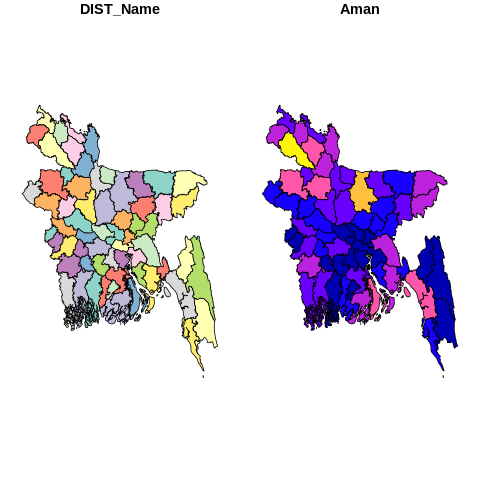

In [ ]:
%%R
SFDF.subset %>%
  select(DIST_Name, Aman) %>%
  plot()

You can also apply **dplyr::filter** and  **dplyr::select** together to create a new sf object and then plot it using **ggplot()** function:

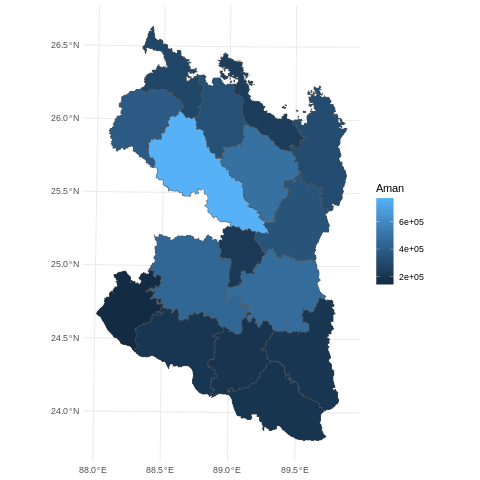

In [ ]:
%%R
SFDF.subset %>%
  filter(DIV_Name %in% c("Rangpur", "Rajshahi")) %>%
  select(DIST_Name, Aman) %>%
  ggplot() +
  geom_sf(aes(fill = Aman)) +
  theme_minimal()

We can keeps only rows matching given criteria, for example,  keep the  districts where Boro production lower than mean.

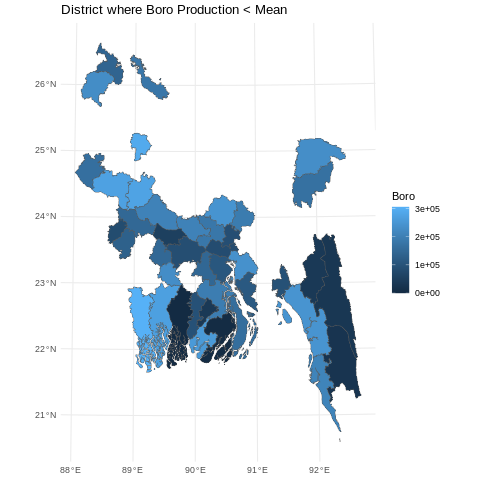

In [ ]:
%%R
 SFDF.new %>%
  filter(Boro < mean(SFDF.new$Boro)) %>%
    ggplot() +
    geom_sf(aes(fill = Boro)) +
    theme_minimal() +
    ggtitle("District where Boro Production < Mean")

### Attribute aggregation

Vector attribute aggregation involves summarizing or calculating statistics from attribute data associated with geographic features in a vector dataset. This process allows you to condense and analyze the attribute information for specific groups, areas, or conditions within your spatial data.

An example of attribute aggregation is calculating total Boro production per division based on the district level data


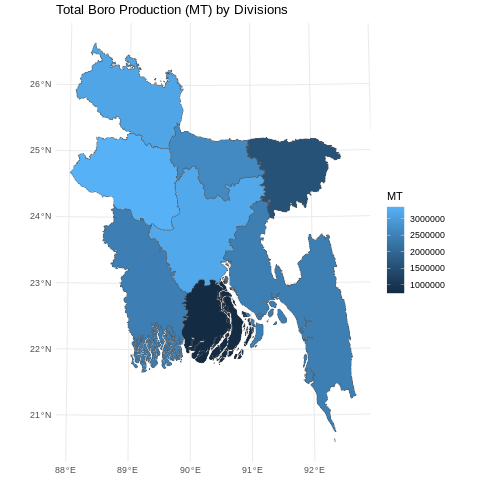

In [ ]:
%%R
SFDF.new %>%
  group_by(DIV_Name) %>%
  summarise(MT =sum(Boro)) %>%
  ggplot() +
  geom_sf(aes(fill = MT)) +
  theme_minimal() +
  ggtitle("Total Boro Production (MT) by Divisions")

### Vector attribute joining

Vector attribute joining involves combining attribute data from two or more datasets based on a common identifier or key. This process allows you to enhance or enrich your data by adding information from one dataset to another. In the context of spatial data analysis, attribute joining is often used to combine non-spatial data with spatial features based on a shared attribute, such as an ID or name. In R, you can use packages like sf and dplyr from the tidyverse to perform attribute joins on vector data. In this exercise will we will combine data on poverty percentage  with the  upazila shape file of Bangladesh.  

In [ ]:
%%R
urlfile.poverty = "https://github.com//zia207/r-colab/raw/main/Data/Bangladesh/bd_poverty.csv"
poverty<-read_csv(url(urlfile.poverty)) %>%
  glimpse()

Rows: 544 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ADM3_PCODE
dbl (1): POVERTY_PERCENT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 544
Columns: 2
$ ADM3_PCODE      <chr> "BD400108", "BD400114", "BD400134", "BD201358", "BD400…
$ POVERTY_PERCENT <dbl> 35.9, 50.0, 36.4, 42.5, 46.1, 41.9, 46.5, 41.1, 48.0, …


In [ ]:
%%R
SFDF.upz = sf::st_read("/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_upzila_BTM.shp")

Reading layer `bd_upzila_BTM' from data source 
  `/vsicurl/https://github.com//zia207/r-colab/raw/main/Data/Bangladesh//Shapefiles/bd_upzila_BTM.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 544 features and 16 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 298487.8 ymin: 278578.1 xmax: 778101.8 ymax: 946939.2
Projected CRS: +proj=tmerc +lat_0=0 +lon_0=90 +k=0.9996 +x_0=500000 +y_0=-2000000 +datum=WGS84 +units=m +no_defs


Following R code will first  1) select some column, 2) rename them  3) join  the poverty  data  with a common ID (ADM3_PCODE) with **dplyr::inner_join()** function , 4) finally plot the poverty percentage using ggplot()

Joining with `by = join_by(ADM3_PCODE)`


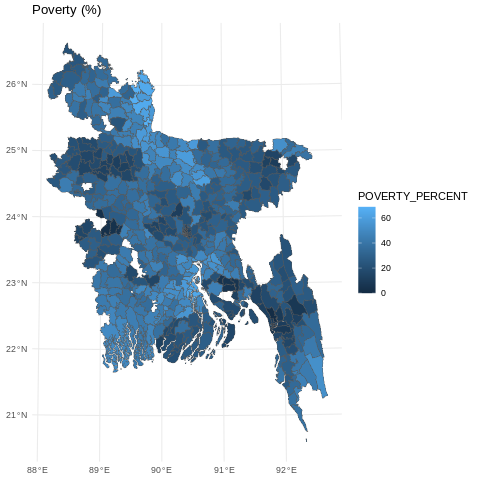

In [ ]:
%%R
SFDF.upz %>%
  select(ADM1_EN, ADM2_EN, ADM3_EN, ADM3_PCODE) %>%
  rename(DIST_Name = ADM2_EN, DIV_Name = ADM1_EN, UPZ_Name =ADM3_EN ) %>%
  inner_join(poverty) %>%
  ggplot() +
  geom_sf(aes(fill =  POVERTY_PERCENT )) +
  theme_minimal() +
  ggtitle("Poverty (%)")

### Creating new attributes

Creating attributes in spatial data involves adding new columns or variables to the attribute table associated with geographic features in a vector dataset. These attributes can store additional information, calculated values, or metadata that provide context and meaning to the spatial features.

For example, we will calculate total rice production for each district and create a new attribute name "Total_Production". For this we need to add Aus, Aman and Boro attributes.

Using base R, we can type:

In [ ]:
%%R
SFDF.new$Total <-SFDF.new$Aus+SFDF.new$Aman+SFDF.new$Boro
glimpse(SFDF.new)

Rows: 64
Columns: 21
$ Shape_Leng <dbl> 5.358126, 4.167970, 7.713625, 10.091155, 4.289236, 3.598531…
$ Shape_Area <dbl> 0.40135919, 0.11780114, 0.19522826, 0.17081236, 0.26009774,…
$ DIST_Name  <chr> "Bandarban", "Barguna", "Barisal", "Bhola", "Bogra", "Braha…
$ ADM2_PCODE <chr> "BD2003", "BD1004", "BD1006", "BD1009", "BD5010", "BD2012",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Coxs Bazar", NA, N…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ DIV_Name   <chr> "Chittagong", "Barisal", "Barisal", "Barisal", "Rajshahi", …
$ ADM1_PCODE <chr> "BD20", "BD10", "BD10", "BD10", "BD50", "BD20", "BD20", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

Alternatively, we can use one of dplyr functions **mutate()** which adds new columns at the penultimate position in the sf object (the last one is reserved for the geometry):

In [ ]:
%%R
SFDF.new  %>%
  mutate(Total = Aus+Aman+Boro) %>%
  glimpse()

Rows: 64
Columns: 21
$ Shape_Leng <dbl> 5.358126, 4.167970, 7.713625, 10.091155, 4.289236, 3.598531…
$ Shape_Area <dbl> 0.40135919, 0.11780114, 0.19522826, 0.17081236, 0.26009774,…
$ DIST_Name  <chr> "Bandarban", "Barguna", "Barisal", "Bhola", "Bogra", "Braha…
$ ADM2_PCODE <chr> "BD2003", "BD1004", "BD1006", "BD1009", "BD5010", "BD2012",…
$ ADM2_REF   <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Coxs Bazar", NA, N…
$ ADM2ALT1EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ ADM2ALT2EN <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ DIV_Name   <chr> "Chittagong", "Barisal", "Barisal", "Barisal", "Rajshahi", …
$ ADM1_PCODE <chr> "BD20", "BD10", "BD10", "BD10", "BD50", "BD20", "BD20", "BD…
$ ADM0_EN    <chr> "Bangladesh", "Bangladesh", "Bangladesh", "Bangladesh", "Ba…
$ ADM0_PCODE <chr> "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD", "BD",…
$ date       <chr> "2015/01/01", "2015/01/01", "2015/01/01", "2015/01/01", "20…
$ validOn    <chr> 

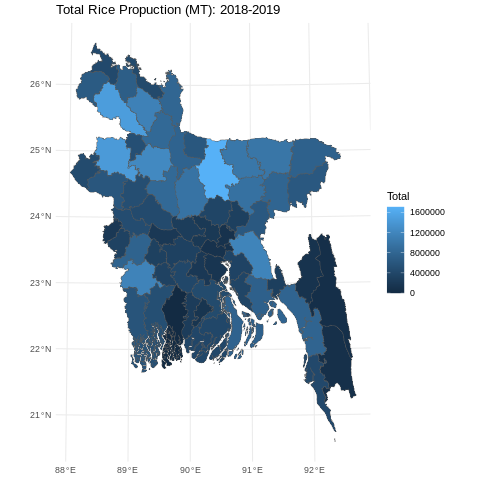

In [ ]:
%%R
SFDF.new  %>%
  mutate(Total = Aus+Aman+Boro) %>%
  ggplot() +
  geom_sf(aes(fill =  Total )) +
  theme_minimal() +
  ggtitle("Total Rice Propuction (MT): 2018-2019")
